<a href="https://colab.research.google.com/github/gjrkdgh0772/Finance/blob/main/lec02_%EA%B8%88%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<font size=6><b>금리 & 채권</b></font>
* ref [2021년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10063199&menuNo=200690&pageIndex=1
* ref [2022년 1월 금융기관 가중평균금리] : https://www.bok.or.kr/portal/bbs/P0000559/view.do?nttId=10069319&menuNo=200690
* ref : https://www.ytn.co.kr/_ln/0102_201910301518564398
* ref [ECOS] : http://ecos.bok.or.kr/flex/ClassSearch.jsp

In [ ]:
! pip install QuantLib

In [ ]:
import pandas as pd
import numpy as np
import QuantLib as ql
from datetime import date
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import warnings
warnings.filterwarnings(action='ignore')

# numeric_level = getattr(logging, 'INFO', None)
# logging.basicConfig(level=numeric_level, format='%(asctime)s %(levelname)-8s %(message)s', datefmt='%Y-%m-%d %H:%M:%S')

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 통화 및 유동성 지표

* <b>본원통화 (本源通貨, Reserve Base , monetary base 또는 base money) : 중앙은행 화폐발행액, 시중은행으로 보낸 돈
  - 현금통화 + 예금은행시재금 + 중앙은행 지급준비예치금<br>
* 시장에 풀린 본원통화는 크게 다음 두가지 방식으로 유통된다.
   - <b>현금통화 </b> : 현금의 형태로 실제 시장에 풀려 유통
   - <b>지급준비금</b> : 시중은행으로 흘러들어가는 돈      

* 통화지표 <br>
   (예) 초기에 10일은 4만원 입금,  이 후 20일은 6만원 입금
  - <b>평잔</b> : ( ( 40,000 * 10일 ) + ( 60,000 * 20일 ) ) / 30일 = 80,000원
  - <b>말잔</b> : 10만원
  - 통상적으로는 평잔보다 말잔이 높다
 <table>
    <tr>
        <td><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcZmxkR%2FbtqUeiF5uad%2FNk4LaGuEczfLzPYlsh0rJK%2Fimg.png'></td>
        <td><img src='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Few5rPj%2FbtqUeXhn0Ih%2F7fbSacPBHtreGVgdGF2MfK%2Fimg.png'></td>
    </tr>
</table>
          

#본원통화 데이터 가져오기

In [ ]:
본원통화 = pd.read_csv('/content/drive/MyDrive/금융/dataset/lec_02금리데이터.csv',encoding='cp949',thousands=',',skipfooter=5,skiprows=[0,2,3])

In [ ]:
본원통화.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   항목명1              11 non-null     int64  
 1   본원통화(말잔, 계절조정계열)  11 non-null     float64
 2   현금통화              11 non-null     float64
 3   중앙은행 대 예금취급기관부채   11 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 480.0 bytes


In [ ]:
본원통화 = 본원통화.set_index('항목명1') 

In [ ]:
본원통화

,"본원통화(말잔, 계절조정계열)",현금통화,중앙은행 대 예금취급기관부채
항목명1,,,
2011,77508.1,38978.2,38529.9
2012,86077.8,43873.5,42204.4
2013,102276.0,52942.1,49333.9
2014,115375.6,64182.5,51193.2
2015,130151.6,75969.4,54182.3
2016,141968.5,85692.0,56276.4
2017,154682.6,95559.1,59123.4
2018,173189.2,104182.0,69007.3
2019,193331.8,114711.6,78620.2


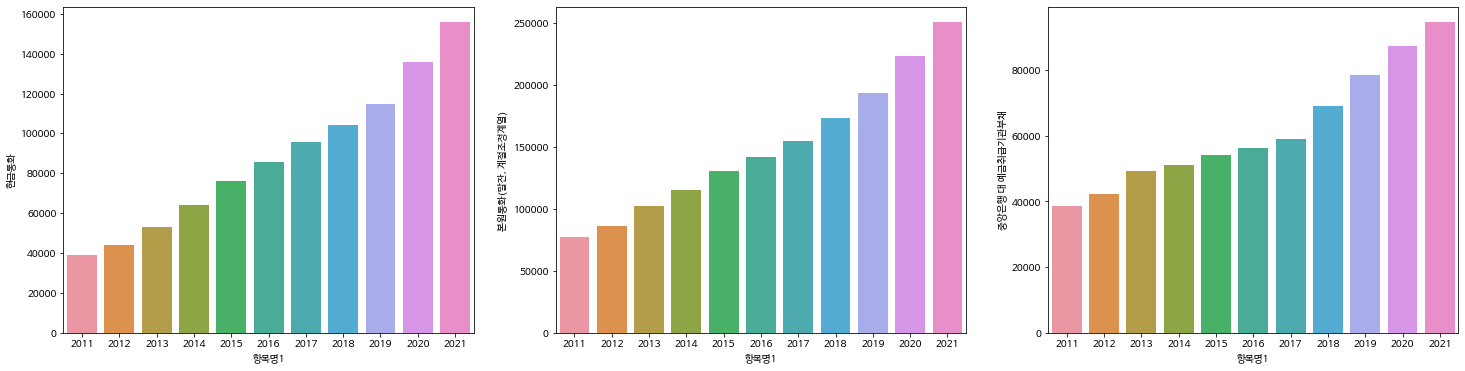

In [ ]:
p, axes = plt.subplots(1,3, figsize = (25,6))
sns.barplot(x=본원통화.index, y=본원통화["현금통화"], data=본원통화,label=본원통화['현금통화'], ax=axes[0])
sns.barplot(x=본원통화.index, y=본원통화["본원통화(말잔, 계절조정계열)"], data=본원통화,ax=axes[1])
sns.barplot(x=본원통화.index, y=본원통화["중앙은행 대 예금취급기관부채"], data=본원통화, ax=axes[2])

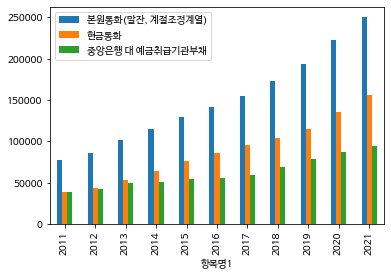

In [ ]:

본원통화[["본원통화(말잔, 계절조정계열)", "현금통화", "중앙은행 대 예금취급기관부채"]].plot.bar()
plt.rcParams["figure.figsize"] = (20, 10)
plt.show()


# 금리 

## 기준금리
* 금리 체계의 기준이 되는 금리

In [ ]:
#-------주요 국가 금리 비교 ------------

## 시장금리

* <b>COFIX</b>(Cost of Funds Index): 8개 은행의 자금조달 관련 정보를 기초로 산출되는 자금조달비용지수
* <b>KORIBOR</b> : 은행간 만든 단기 기준금리
* 단기투자상품 CD, CP,PR
  - <b>CD</b>(Certificate of Deposit) : 양도성예금증서
  - <b>CP</b>(Commercial Paper) : 기업어음 
  - <b>RP</b>Repurchase Agreements) : 환매조건부채권 

In [ ]:
#-------시장 금리 비교 ------------

In [ ]:
금리 = pd.read_csv('/content/drive/MyDrive/금융/dataset/lec_02금리종류.csv',encoding='cp949',thousands=',',skipfooter=5,skiprows=[0,2,3])

In [ ]:
금리.tail(10)

,항목명1,KORIBOR(12개월),CD(91일),CP(91일),한국은행 기준금리
130,2021/11,1.71,1.17,1.34,1.00
131,2021/12,1.76,1.27,1.54,1.00
132,2022/01,1.80,1.39,1.60,1.25
133,2022/02,1.94,1.50,1.64,1.25
134,1) 4.1.2 시장금리(월,분기,년),NaN,NaN
135,통계담당 : 한국은행 금융시장국 채권시장팀(02-759-5630),None,None,NaN,NaN
136,주 : 1) 월평균(영업일기준),None,None,NaN,NaN
137,2) 국고채(30년) : 2012.9월부터 발행,None,None,NaN,NaN
138,3) 통안증권(1년) : 2011.5.1부터 364일물(할인채)에서 1년물(이표채)...,None,None,NaN,NaN
139,2) 2.6.한국은행 기준금리 및 여수신금리,None,None,NaN,NaN


In [ ]:
금리 = 금리.drop([134,135,136,137,138,139],axis=0)

In [ ]:
금리 = 금리.set_index('항목명1')

In [ ]:
금리.head()

,KORIBOR(12개월),CD(91일),CP(91일),한국은행 기준금리
항목명1,,,,
2011/01,3.44,2.93,3.12,2.75
2011/02,3.74,3.13,3.31,2.75
2011/03,3.77,3.35,3.53,3.00
2011/04,3.75,3.40,3.54,3.00
2011/05,3.75,3.46,3.58,3.00


In [ ]:
금리['KORIBOR(12개월)'].astype(int)

ValueError: ignored

In [ ]:
#-------기준금리에 따른 시장금리 변화 비교 ------------

In [ ]:
#-------시장 금리 비교 ------------

In [ ]:
# () 중앙은행의 기준금리 변화에 대한 시중은행의 예금금리와 대출금리의 비대칭적 변동을 실증 분석
# https://www.kci.go.kr/kciportal/ci/sereArticleSearch/ciSereArtiView.kci?sereArticleSearchBean.artiId=ART002530569
        